In [6]:
import pickle
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN

In [2]:
detObj = pickle.load( open( "frame.p", "rb" ) )
detObj

{'numObj': 13,
 'rangeIdx': array([4, 3, 4, 5, 4, 5, 3, 4, 5, 4, 5, 4, 5], dtype=int16),
 'range': array([0.1875  , 0.140625, 0.1875  , 0.234375, 0.1875  , 0.234375,
        0.140625, 0.1875  , 0.234375, 0.1875  , 0.234375, 0.1875  ,
        0.234375]),
 'dopplerIdx': array([ 0, -3, -3, -3, -2, -2, -1, -1, -1, -2, -2, -1, -1], dtype=int16),
 'doppler': array([ 0.        , -0.37501   , -0.37501   , -0.37501   , -0.25000667,
        -0.25000667, -0.12500333, -0.12500333, -0.12500333, -0.25000667,
        -0.25000667, -0.12500333, -0.12500333]),
 'peakVal': array([34, 26, 51, 39, 47, 34, 43, 41, 27, 37, 31, 35, 20], dtype=int16),
 'x': array([-0.11132812, -0.09179688, -0.12304688, -0.15429688, -0.01757812,
        -0.15429688, -0.08398438, -0.11132812, -0.2265625 , -0.1875    ,
        -0.02148438, -0.18164062, -0.13867188]),
 'y': array([0.15039062, 0.10546875, 0.140625  , 0.17773438, 0.1875    ,
        0.17773438, 0.11328125, 0.15039062, 0.05859375, 0.        ,
        0.23242188, 0.04

In [3]:
x = detObj['x']
y = detObj['y']
x.ndim
y.ndim

pos = np.vstack((x, y)).T
pos

array([[-0.11132812,  0.15039062],
       [-0.09179688,  0.10546875],
       [-0.12304688,  0.140625  ],
       [-0.15429688,  0.17773438],
       [-0.01757812,  0.1875    ],
       [-0.15429688,  0.17773438],
       [-0.08398438,  0.11328125],
       [-0.11132812,  0.15039062],
       [-0.2265625 ,  0.05859375],
       [-0.1875    ,  0.        ],
       [-0.02148438,  0.23242188],
       [-0.18164062,  0.046875  ],
       [-0.13867188,  0.18945312]])

In [4]:
df = pd.DataFrame(pos, columns=['x', 'y'])
df

,x,y
0,-0.111328,0.150391
1,-0.091797,0.105469
2,-0.123047,0.140625
3,-0.154297,0.177734
4,-0.017578,0.187500
5,-0.154297,0.177734
6,-0.083984,0.113281
7,-0.111328,0.150391
8,-0.226562,0.058594
9,-0.187500,0.000000


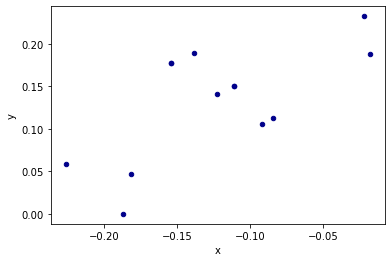

In [5]:
ax1 = df.plot.scatter(x='x',
                      y='y',
                      c='DarkBlue')

In [26]:
clustering = DBSCAN(eps=0.05, min_samples=1)
clustering.fit(pos)
labels = clustering.labels_
labels

array([0, 0, 0, 0, 1, 0, 0, 0, 2, 2, 1, 2, 0], dtype=int64)

In [27]:
n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
n_clusters

3

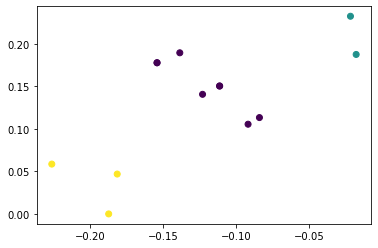

In [28]:
plt.scatter(pos[:,0], pos[:,1], c=labels)
plt.title('Number of detected objects: %d' % n_clusters)
plt.show()